In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx

episodes_df = pd.read_csv("data/simpsons_episodes.csv", index_col="id").sort_index()
text_df = pd.read_csv("data/simpsons_script_lines.csv", error_bad_lines=False).sort_index()

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

In [5]:
import itertools
sorted_text_df = text_df.sort_values("id")#["raw_character_text"]#.to_numpy()

main_characters = list(text_df["raw_character_text"].value_counts().index[:20])
main_characters

character_dict = {character:i for i, character in enumerate(main_characters)}
id_dict = {i:character for i, character in enumerate(main_characters)}


In [8]:
G = nx.Graph()

raw_location_text_before = ""
episode_id_before = -1
for i in range(len(sorted_text_df)):

    # is something spoken?
    if sorted_text_df["speaking_line"].iloc[i] == False or sorted_text_df["speaking_line"].iloc[i] == "false":
        # print(sorted_text_df["speaking_line"].iloc[i])
        continue

    # check if episode and location of text is the same
    if raw_location_text_before != sorted_text_df["raw_location_text"].iloc[i] or sorted_text_df["episode_id"].iloc[i] != episode_id_before:
        raw_location_text_before = sorted_text_df.iloc[i]["raw_location_text"]
        episode_id_before = sorted_text_df.iloc[i]["episode_id"]
        continue

    raw_location_text_before = sorted_text_df.iloc[i]["raw_location_text"]
    episode_id_before = sorted_text_df.iloc[i]["episode_id"]
    

    # get characters
    c1 = sorted_text_df["raw_character_text"].iloc[i]
    c2 = sorted_text_df["raw_character_text"].iloc[i+1]

    # if type(first) == float or type(second) == float:
    if c1 not in main_characters or c2 not in main_characters:
        continue

    sorted_characters = sorted([c1, c2])
    try:
        G.edges[sorted_characters]["weight"] += 1
    except KeyError:
        G.add_edge(sorted_characters[0], sorted_characters[1], weight=1)

    

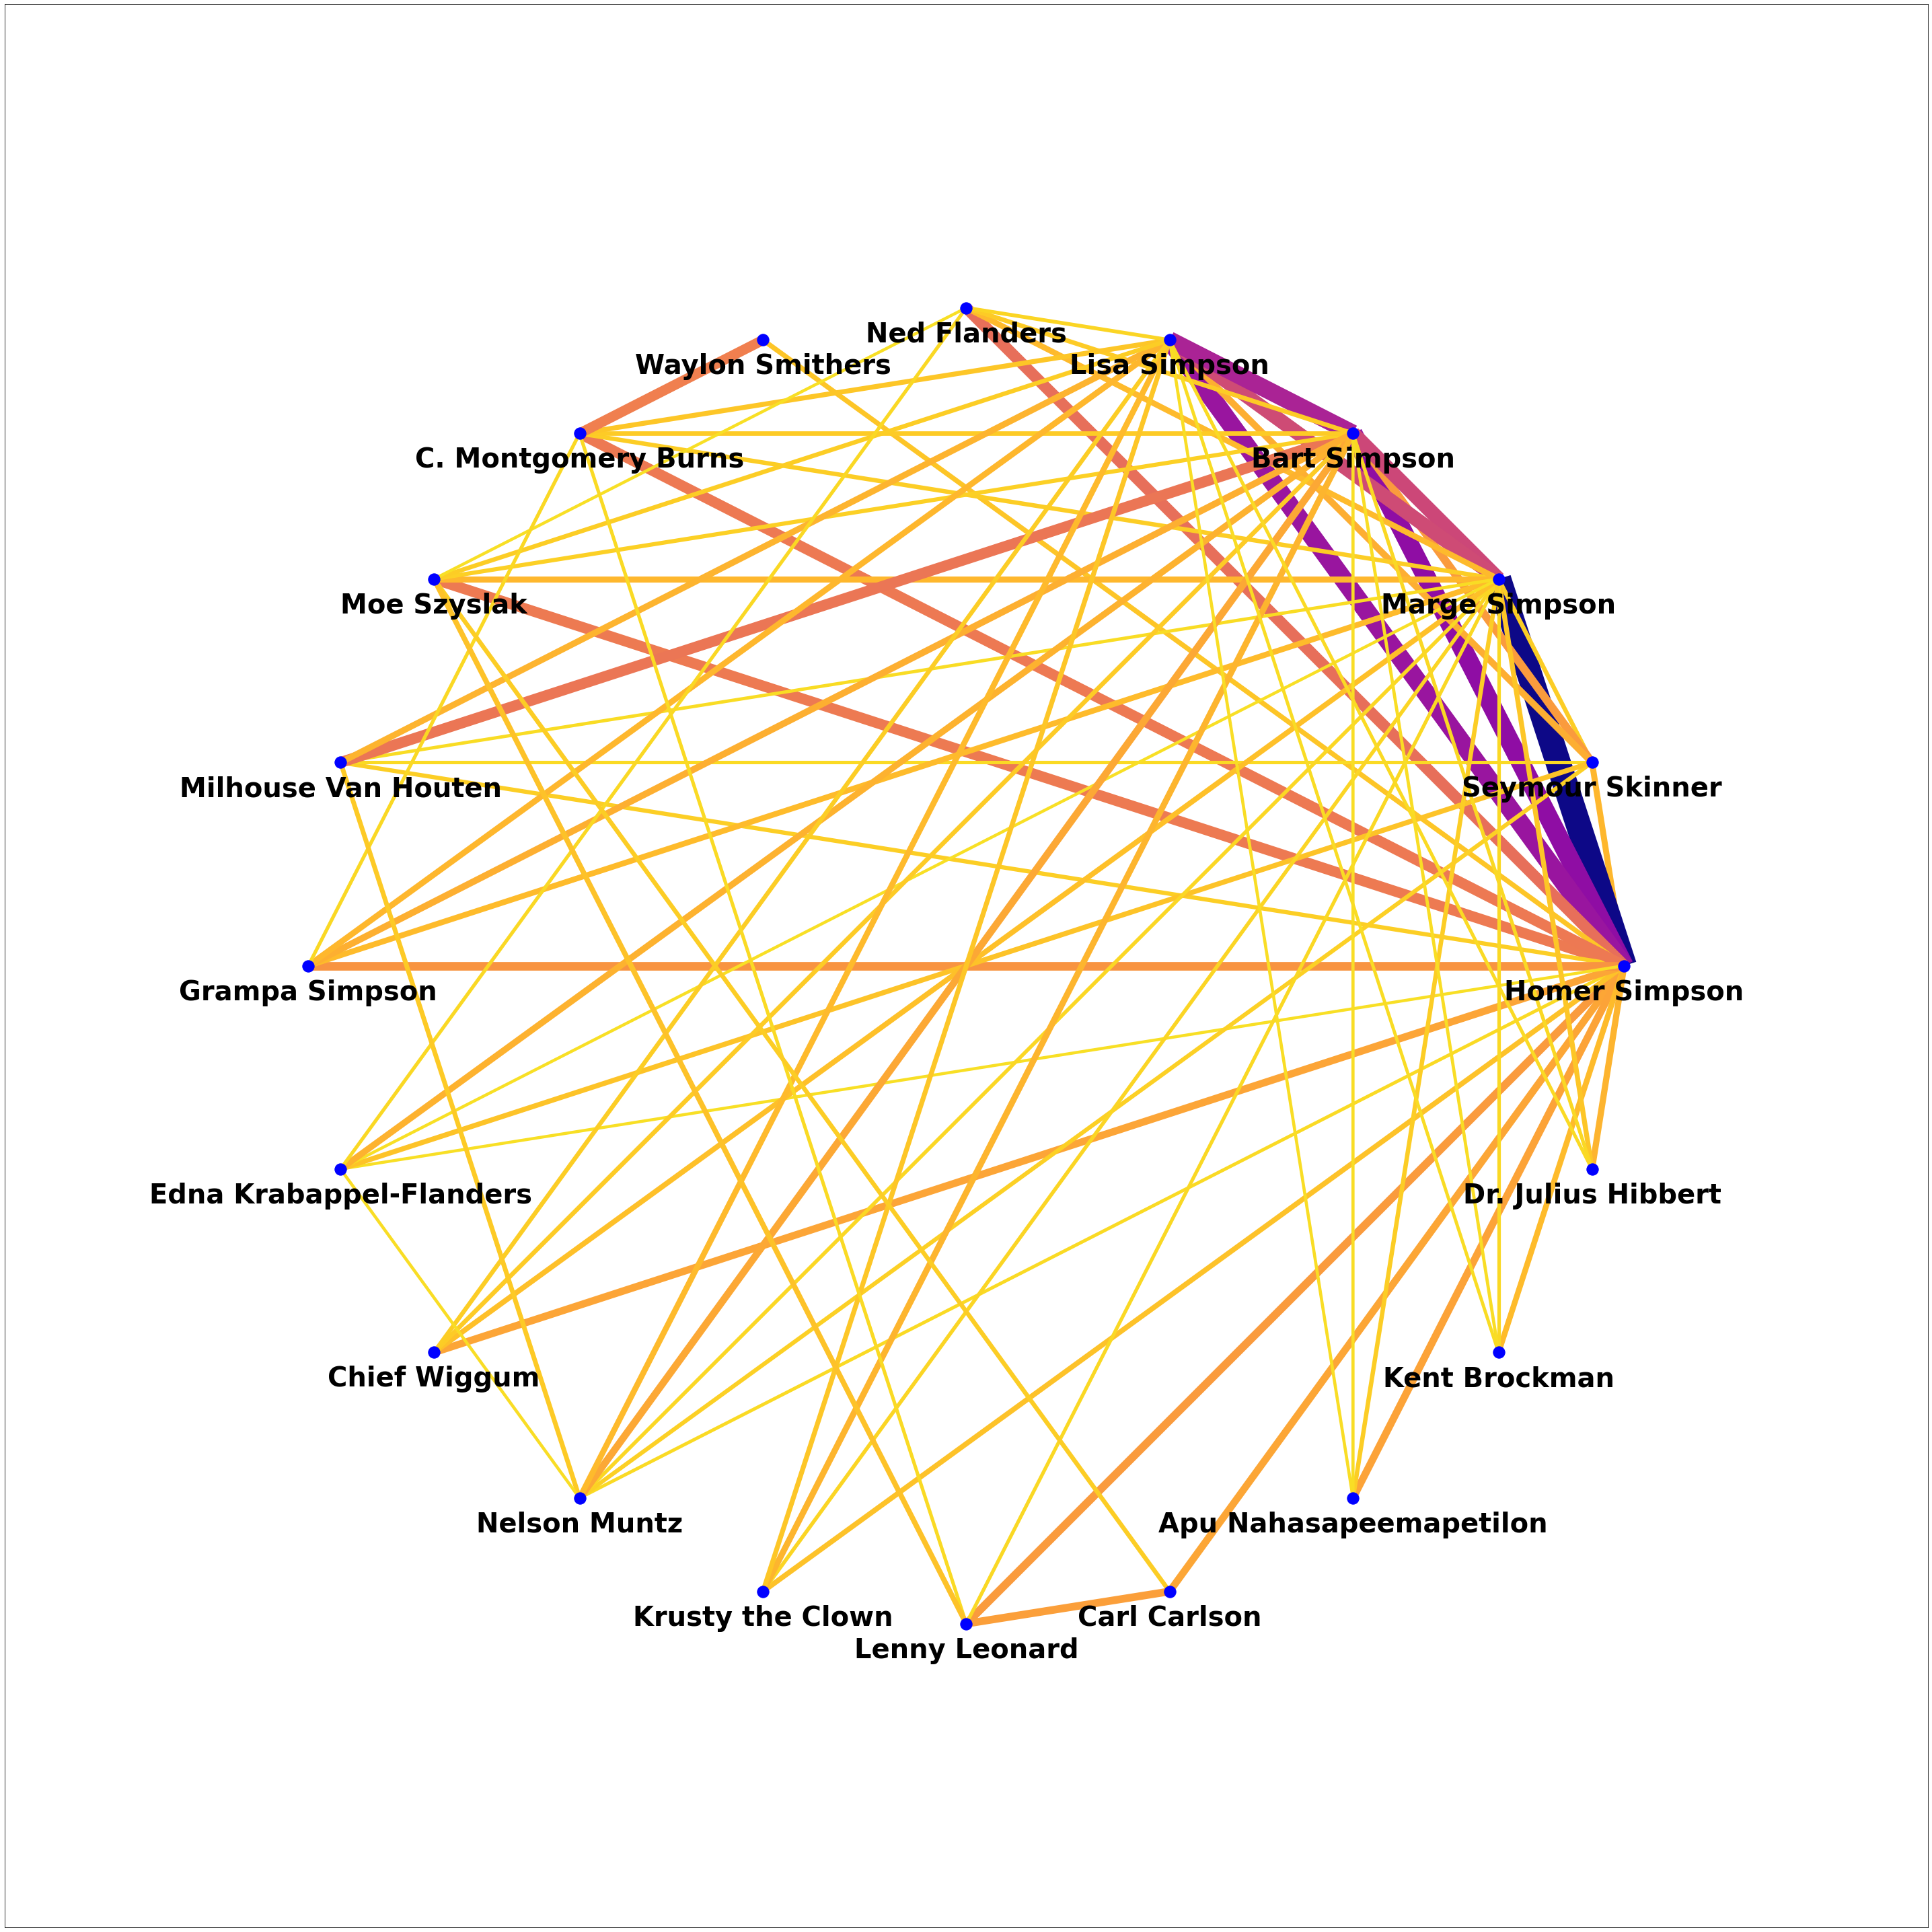

In [9]:
plt.figure(figsize=(40,40))

pos = nx.circular_layout(G) 

edges = G.edges()
colors = [G[u][v]['weight']**0.5 for u,v in edges]
weights = [G[u][v]['weight']**0.4 if G[u][v]['weight'] > 40 else 0 for u,v in edges]

cmap = matplotlib.cm.get_cmap('plasma_r')
nx.draw_networkx(G, pos, width=weights, edge_color=colors, node_color="blue", edge_cmap=cmap, with_labels=False)

labels_pos = {name:[pos_list[0], pos_list[1]-0.04] for name, pos_list in pos.items()}
nx.draw_networkx_labels(G, labels_pos, font_size=40, font_family="sans-serif", font_color="#000000", font_weight="bold")

ax = plt.gca()
ax.margins(0.25)
plt.axis("equal")
plt.tight_layout()
plt.savefig("simpsons_interaction")